# LLE on HSI data - SalinasA. This is the [LLE Class](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html) implementation. Scroll down for the functional implementation.

In [3]:
from umap_script import loadHSI, show_clusterable_embedding, visualize_umap, compare_umap, k_means, calculate_aligned_accuracy, plot

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import locally_linear_embedding
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
salinasA_path = 'data/SalinasA_corrected.mat'
salinasA_gt_path = 'data/SalinasA_gt.mat'

X, M, N, D, HSI, GT, Y, n, K = loadHSI(salinasA_path, salinasA_gt_path, 'salinasA_corrected', 'salinasA_gt')

In [5]:
print(HSI.shape)
print(GT.shape)

(7138, 204)
(83, 86)


In [6]:
def LLE_projection_2d(hsi_data,ground_truth,num_neighbors):
    LLE = LocallyLinearEmbedding(n_neighbors=num_neighbors,n_components=3)
    embedding = LLE.fit_transform(hsi_data)

    # Visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
    plt.title('2D LLE (Local Linear Embedding) Projection of the Dataset')
    plt.colorbar(scatter, label='Spectral classes')
    plt.xlabel('LLE 1')
    plt.ylabel('LLE 2')
    plt.show()

Number of neighbors = 1000

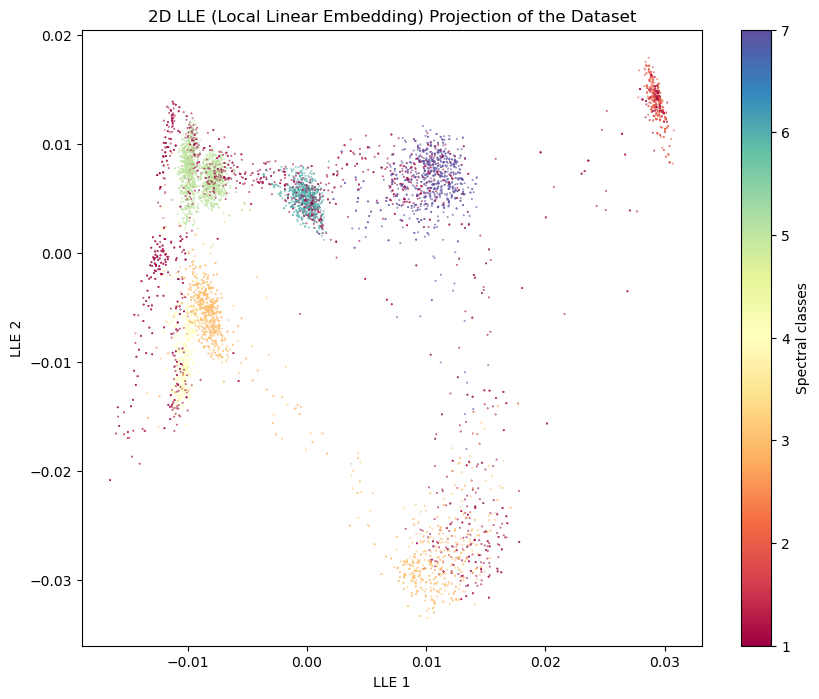

In [7]:
LLE_projection_2d(HSI,GT,1000)

Number of neighbors - 5 (default)

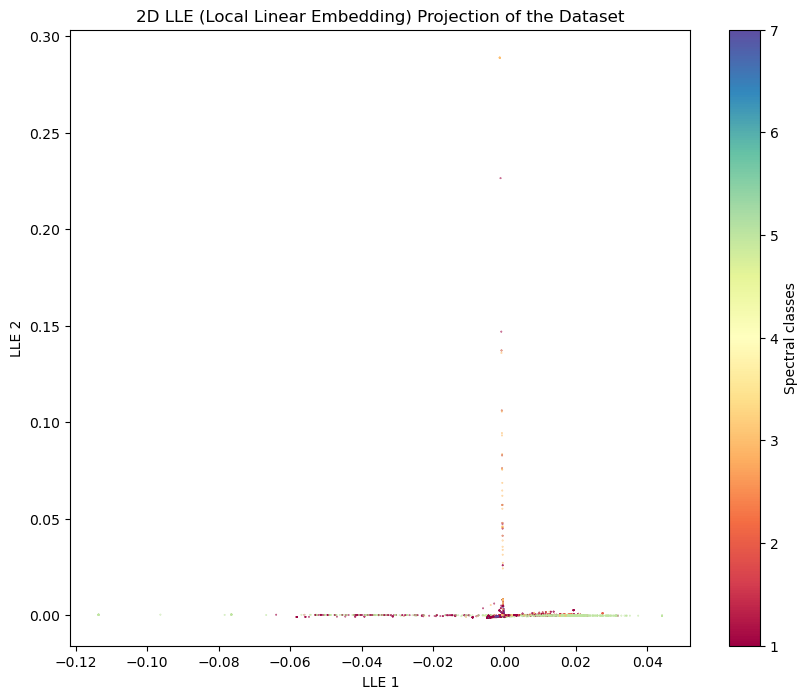

In [9]:
LLE_projection_2d(HSI,GT,5)

In [15]:
def visualize_lle(hsi_data,num_neighbors=1000,title='',num_components=3):
    LLE = LocallyLinearEmbedding(n_neighbors=num_neighbors,n_components=num_components)
    u = LLE.fit_transform(hsi_data)
    plt.title(title, fontsize=18)
    return u

In [ ]:
k_means(GT,dim_reduced_data = visualize_lle(HSI,num_neighbors=1000),n_components=3,method = "LLE")

In [25]:
def compare_pca(data,ground_truth,dataset_name,compare_dim = 'None',compare_neighbors = "None"):
    lle_ari = []
    lle_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [200,400,600,800,1000,1200]
    if (compare_neighbors):
        for i in range(1,len(dims)):            
            lle_plot = visualize_lle(data,num_components=3,num_neighbors=dims[i])
            k_means_lle_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = 3, method = "LLE")
            k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= 3, method = "PCA")

            lle_ari.append(k_means_lle_ari)
            pca_ari.append(k_means_pca_ari)

            lle_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
            pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

            lle_aligned_acc.append(lle_acc)
            pca_aligned_acc.append(pca_acc)
        dims = dims[1:]
        plot(dims,lle_ari, pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for ' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'LLE (Local Linear Embedding)')
    if (compare_dim):
        dims = [1,2,3,4,5,6]
        for i in range(len(dims)):
            lle_plot = visualize_lle(data,num_neighbors=1000,num_components=dims[i])
          
            k_means_tsne_ari, k_means_tsne_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = dims[i], method = "LLE")
            k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= dims[i], method = "PCA")
            
            lle_ari.append(k_means_tsne_ari)
            pca_ari.append(k_means_pca_ari)

            tsne_acc = calculate_aligned_accuracy(ground_truth, k_means_tsne_labels)
            pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

            lle_aligned_acc.append(tsne_acc)
            pca_aligned_acc.append(pca_acc)

        plot(dims,lle_ari,pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Embedding Dimension for ' + dataset_name, x_label = 'Embedding Dimension', dim_label = 'LLE (Local Linear Embedding)')
        

This section compares LLE (Local Linear Embedding) and PCA (Principal Component Analysis) on n_neighbors.

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45595108248605953
[0 0 0 ... 1 1 1]
0.37942085859126434
[1 1 1 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45873810804283016
[1 1 1 ... 3 3 3]
0.37942085859126434
[1 1 1 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4909019712911069
[3 3 3 ... 1 1 1]
0.37942085859126434
[1 1 1 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48610789912544267
[4 4 4 ... 6 6 6]
0.37942085859126434
[1 1 1 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4880912771451142
[2 2 2 ... 0 0 0]
0.37942085859126434
[1 1 1 ... 5 5 5]


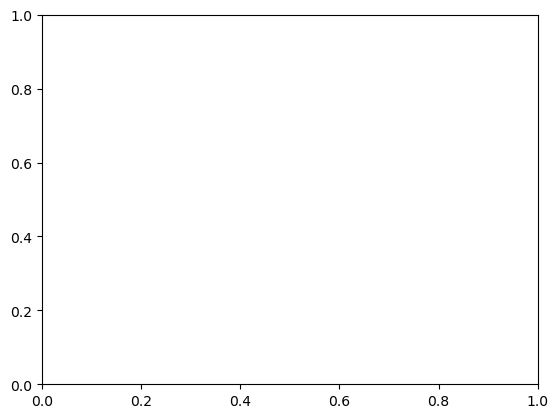

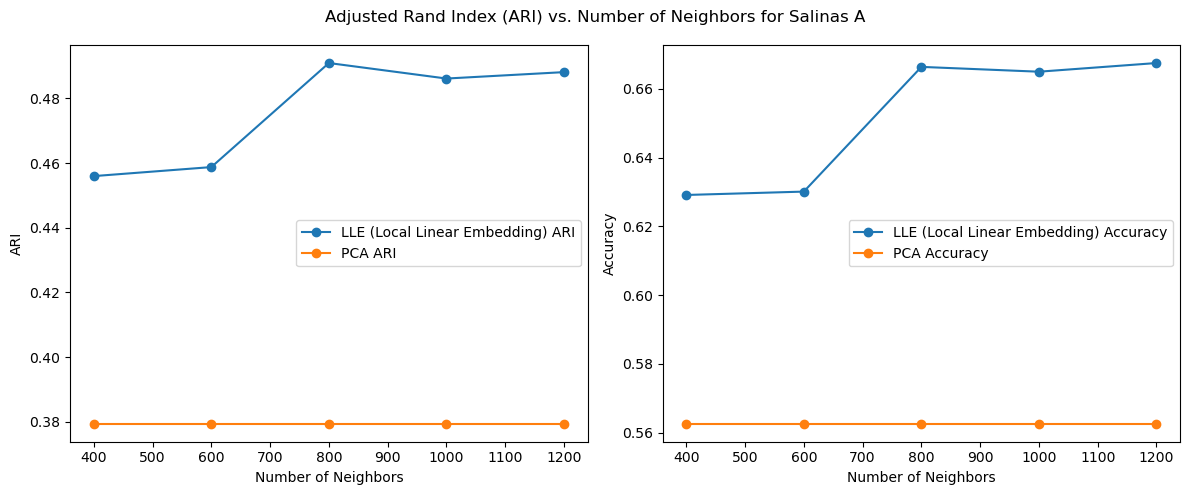

In [22]:
compare_pca(HSI,GT,"Salinas A", compare_dim=False,compare_neighbors=True)

This section compares LLE (Local Linear Embedding) and PCA (Principal Component Analysis) on n_components (dimensionality).

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2437112086744623
[2 2 2 ... 0 0 0]
0.3284105968218777
[0 0 0 ... 3 3 3]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.46773416595873274
[1 1 1 ... 0 0 0]
0.316913830369249
[2 2 2 ... 1 1 1]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48610789912544267
[4 4 4 ... 6 6 6]
0.37942085859126434
[1 1 1 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48587526386925484
[2 2 2 ... 0 0 0]
0.39043446236279167
[3 3 3 ... 0 0 0]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.346792748147299
[3 3 3 ... 6 6 6]
0.3983836359444544
[1 1 1 ... 2 2 2]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4606281751793618
[3 3 3 ... 0 0 0]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3984281767963231
[2 2 2 ... 0 0 0]


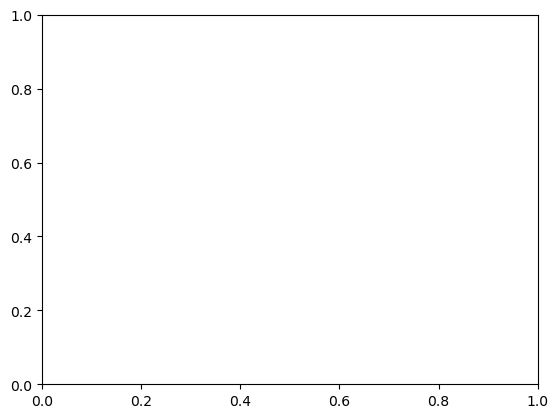

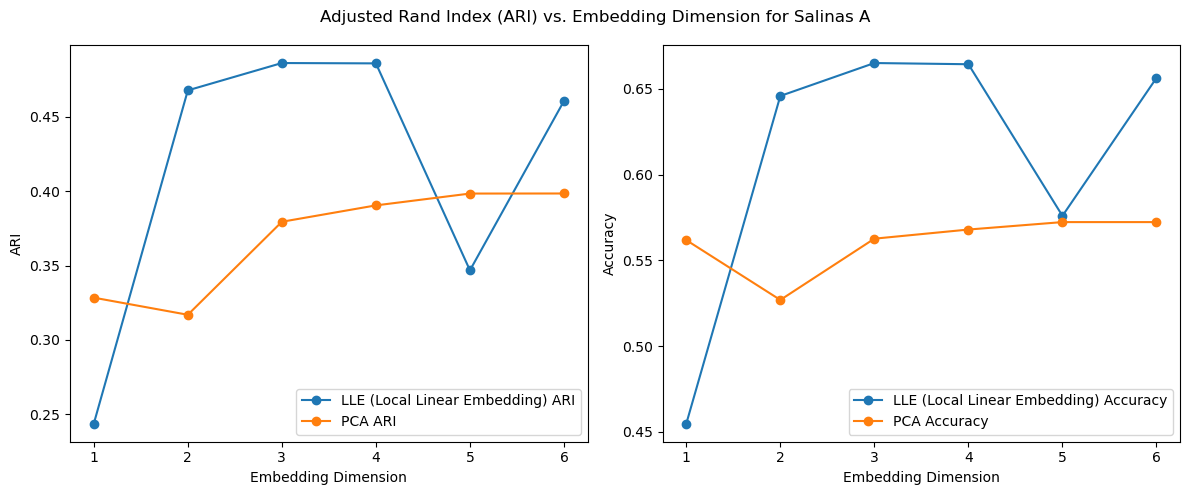

In [26]:
compare_pca(HSI,GT,"Salinas A", compare_dim=True,compare_neighbors=False)

# Below is an implementation of the [Locally Linear Embedding function](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html)

The results are the same as they would be by using the class implementation -- I just ran it using the functional implementation to test certaimn parameters.. Feel free to scroll, but all the implementation is above! (would be the same implementing it here, just need to tweak a few functions and how they're called)

In [25]:
# lll_fn_projection_2d(HSI,GT,1000)
embedding,_ = locally_linear_embedding(HSI,n_neighbors=1000,n_components=3)
embedding

array([[ 0.02886536, -0.01664058,  0.01903771],
       [ 0.02949771, -0.01558746,  0.01937848],
       [ 0.02862968, -0.01720139,  0.01930199],
       ...,
       [-0.01272561, -0.00108702,  0.00905044],
       [-0.01293279, -0.00145236,  0.00864999],
       [-0.01211541, -0.00069009,  0.00741308]])

In [36]:
def lle_fn_projection_2d(ground_truth,hsi_data = None,num = None):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
    ax.set_title("2D Projection of the dataset: LLE Function")

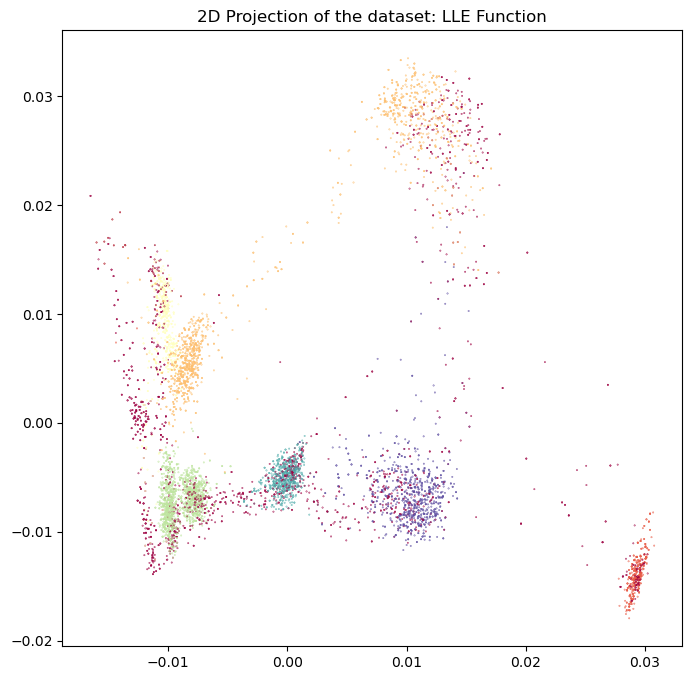

In [37]:
lle_fn_projection_2d(GT)

In [38]:
def visualize_lle_fn(hsi_data,num,title=''):
    embedding,_ = locally_linear_embedding(hsi_data,n_neighbors=num,n_components=3)
    embedding
    plt.title(title, fontsize=18)
    return embedding

array([[-0.04156906, -0.01143269,  0.00015789],
       [-0.04156906, -0.01142947,  0.00019927],
       [-0.04156906, -0.01143151,  0.00017261],
       ...,
       [ 0.00591685, -0.00894729, -0.01676128],
       [ 0.00602482, -0.00938804, -0.01525464],
       [ 0.00602747, -0.00951616, -0.01030048]])

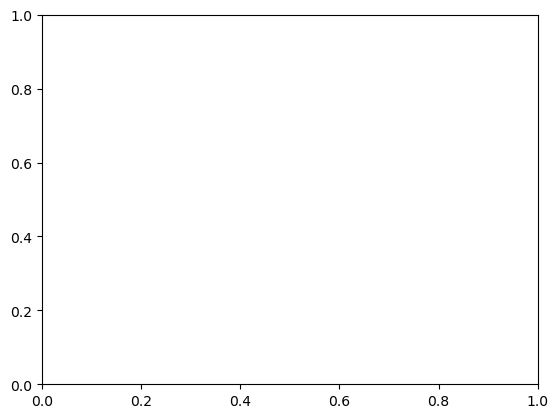

In [39]:
visualize_lle_fn(HSI,50)

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4648409249447008
[2 2 2 ... 4 4 4]


(0.4648409249447008, array([2, 2, 2, ..., 4, 4, 4], dtype=int32))

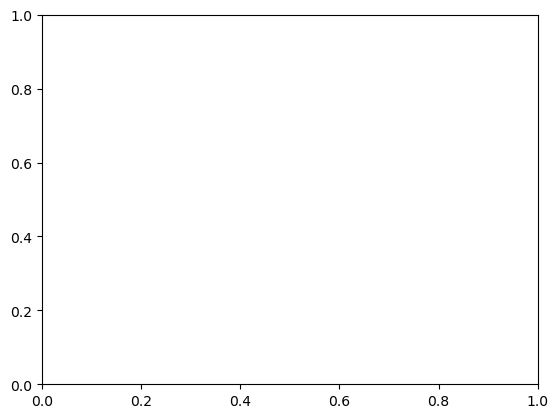

In [40]:
k_means(GT,dim_reduced_data = visualize_lle_fn(HSI,num=50),n_components=3,method = "LLE")

In [42]:
def compare_pca(data,ground_truth,dataset_name,compare_dim,compare_neighbors):
    lle_ari = []
    lle_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [400,600,800,1000]
    pca_dims = [1,2,3,4]
    for i in range(1,len(dims)):            
        lle_plot = visualize_lle_fn(data,num=dims[i])
        k_means_lle_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = 3, method = "LLE")
        k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= pca_dims[i], method = "PCA")

        lle_ari.append(k_means_lle_ari)
        pca_ari.append(k_means_pca_ari)

        lle_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
        pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

        lle_aligned_acc.append(lle_acc)
        pca_aligned_acc.append(pca_acc)
    dims = dims[1:]
    plot(dims,lle_ari, pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'LLE (Local Linear Embedding) Function')

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45843681340235437
[1 1 1 ... 0 0 0]
0.3170340225197159
[0 0 0 ... 6 6 6]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.49087874040235013
[2 2 2 ... 6 6 6]
0.3790962416831678
[3 3 3 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48610789912544267
[2 2 2 ... 6 6 6]
0.39043446236279167
[3 3 3 ... 0 0 0]


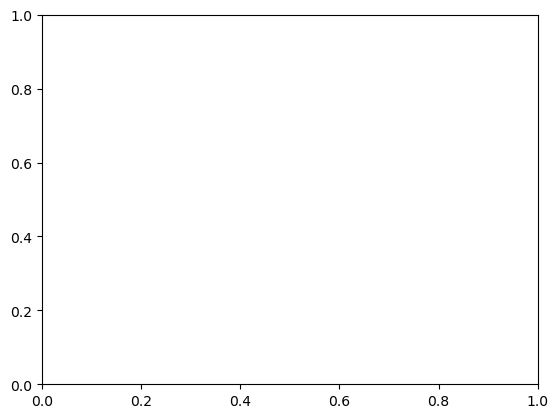

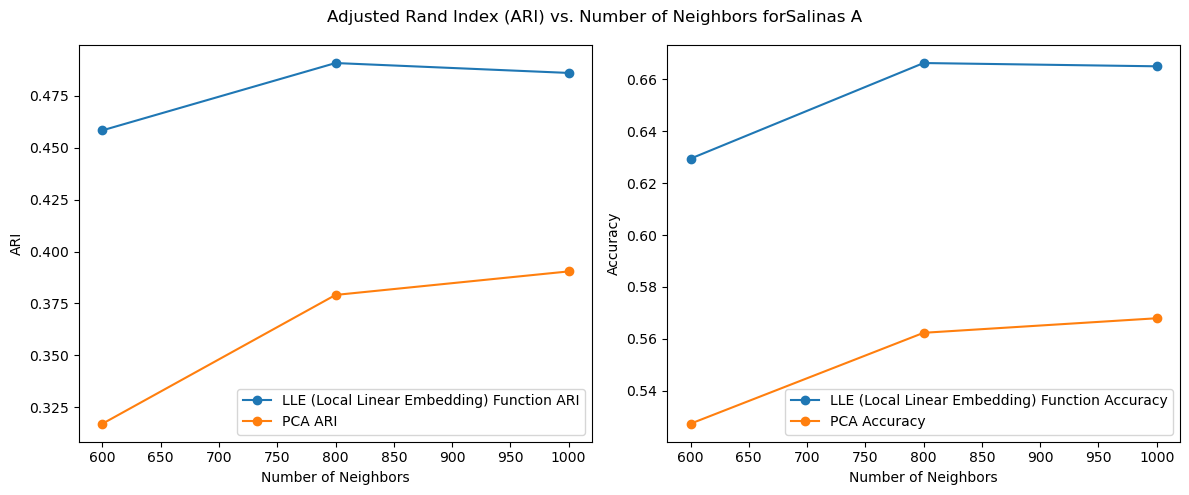

In [43]:
compare_pca(HSI,GT,"Salinas A", True, True)